In [ ]:
# Import library

import pandas as pd  # manipulasi dan analisis data
import numpy as np   # operasi matematika dan array multidimensi
import matplotlib.pyplot as plt  # visualisasi data
import seaborn as sns  # dari matplotlib, untuk membuat visualisasi yang lebih menarik
# from imblearn.over_sampling import SMOTE  # menangani ketidakseimbangan kelas dengan oversampling
from sklearn.model_selection import train_test_split  # membagi dataset menjadi data latih dan data uji
from sklearn.neighbors import KNeighborsClassifier  # algoritma klasifikasi K-Nearest Neighbors (kNN)
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer  # pre-processing data
from sklearn.metrics import classification_report, confusion_matrix #mengevaluasi performa model
from sklearn.metrics import accuracy_score #mengevaluasi performa model
from sklearn.metrics import precision_score #mengevaluasi performa model
from sklearn.metrics import recall_score #mengevaluasi performa model
from sklearn.metrics import f1_score #mengevaluasi performa model
from sklearn.model_selection import GridSearchCV  # mencari k terbaik dengan grid search cross-validation.


In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Import Dataset Abalone

In [ ]:
# Input data abalone format csv
data = pd.read_csv('abalone.csv')

# Baca 5 data teratas
print(data.head())

  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0    M         0.350     0.265   0.090       0.2255         0.0995   
1    M         0.440     0.365   0.125       0.5160         0.2155   
2    I         0.425     0.300   0.095       0.3515         0.1410   
3    F         0.530     0.415   0.150       0.7775         0.2370   
4    F         0.545     0.425   0.125       0.7680         0.2940   

   VisceraWeight  ShellWeight  Rings  
0         0.0485        0.070      7  
1         0.1140        0.155     10  
2         0.0775        0.120      8  
3         0.1415        0.330     20  
4         0.1495        0.260     16  


In [ ]:
# Menghapus parameter yang tidak diperlukan
data.drop(['LongestShell', 'Diameter', 'VisceraWeight',  'ShellWeight',  'Rings'], axis=1, inplace=True)

print(data.head())

  Type  Height  WholeWeight  ShuckedWeight
0    M   0.090       0.2255         0.0995
1    M   0.125       0.5160         0.2155
2    I   0.095       0.3515         0.1410
3    F   0.150       0.7775         0.2370
4    F   0.125       0.7680         0.2940


## Mengeksplor Dataset

In [ ]:
# Menampilkan jumlah baris dan kolom
data.shape

(4174, 4)

In [ ]:
# Menampilkan informasi kolom data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4174 non-null   object 
 1   Height         4174 non-null   float64
 2   WholeWeight    4174 non-null   float64
 3   ShuckedWeight  4174 non-null   float64
dtypes: float64(3), object(1)
memory usage: 130.6+ KB


In [ ]:
# Melihat data yang hilang (NaN)
data.isna().sum()

Type             0
Height           0
WholeWeight      0
ShuckedWeight    0
dtype: int64

In [ ]:
# Menampilkan jumlah data pada setiap 'Type'
data.Type.value_counts()

Type
M    1527
I    1341
F    1306
Name: count, dtype: int64

In [ ]:
data.describe()

,Height,WholeWeight,ShuckedWeight
count,4174.000000,4174.000000,4174.000000
mean,0.139542,0.829003,0.359489
std,0.041826,0.490440,0.221988
min,0.000000,0.002000,0.001000
25%,0.115000,0.441625,0.186125
50%,0.140000,0.800000,0.336000
75%,0.165000,1.153750,0.502000
max,1.130000,2.825500,1.488000


**CEK DISTRIBUSI FITUR/PARAMETER**

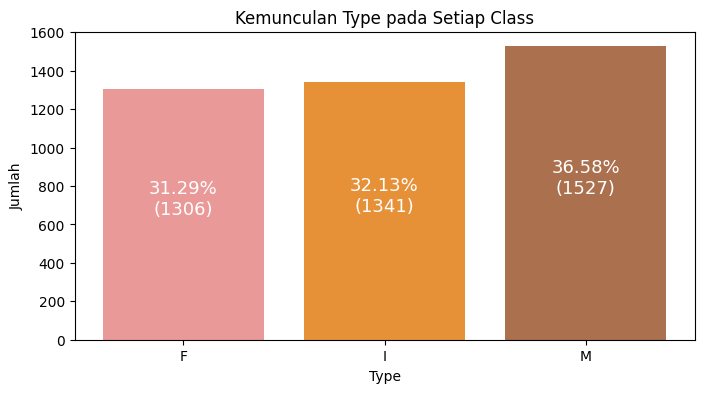

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan setiap nilai pada kolom 'Type' dan mengurutkannya
target_count = data['Type'].value_counts().sort_index()

# Daftar warna hex yang sesuai dengan setiap 'Type'
colors = ['#ea9999', '#e69138', '#AB704D']

# Membuat plot bar dengan menggunakan warna hex
plt.figure(figsize=(8, 4))
bars = plt.bar(target_count.index, target_count.values, color=colors)

# Menambahkan label persentase di atas bar
for bar, val in zip(bars, target_count.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{round(val / sum(target_count) * 100, 2)}%\n({val})',
             ha='center', color='white', fontsize=13)

# Menambahkan judul, label sumbu, dan tanda sumbu pada plot
plt.title('Kemunculan Type pada Setiap Class')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

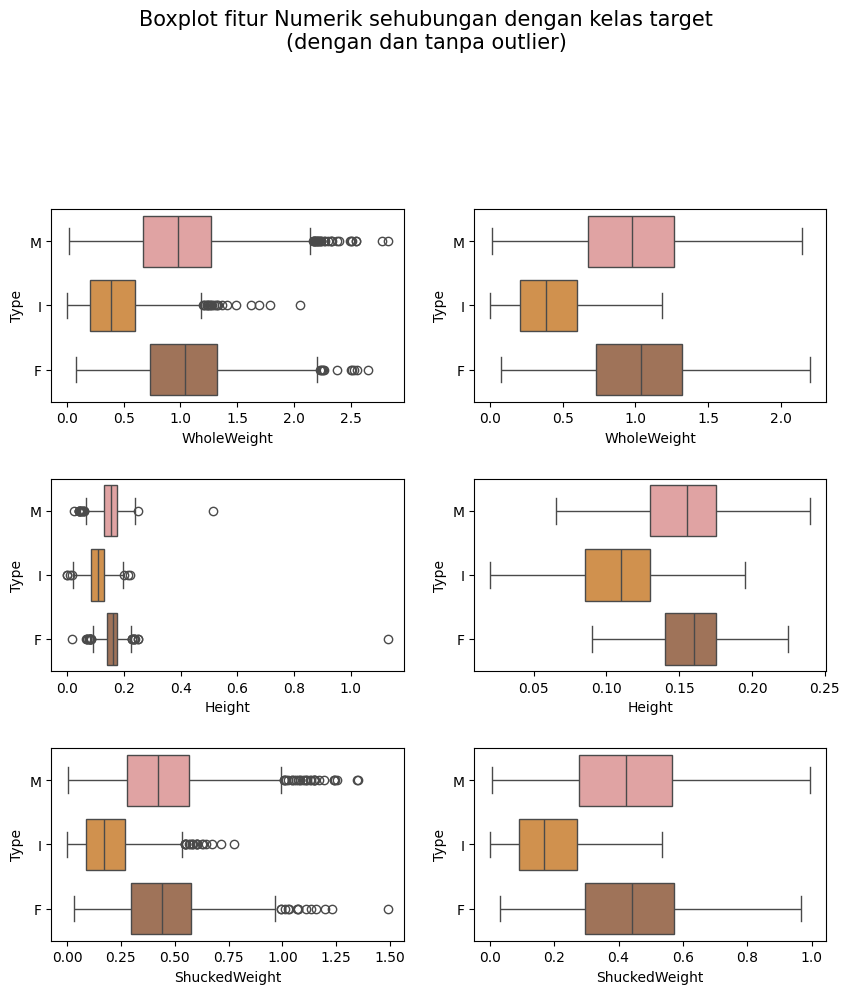

In [ ]:
import seaborn as sns

# Mempersiapkan data numerik dan kategori
numeric = ['WholeWeight', 'Height', 'ShuckedWeight']
categorical = ['Type']

plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.4)

for i, name in enumerate(numeric):
    # Boxplot dengan outlier
    plt.subplot(6, 2, i*2+1)
    sns.boxplot(data=data, x=name, y='Type', orient='h', palette=colors, showfliers=True)

    # Boxplot tanpa outlier
    plt.subplot(6, 2, i*2+2)
    sns.boxplot(data=data, x=name, y='Type', orient='h', palette=colors, showfliers=False)

# Menambahkan judul keseluruhan plot
plt.suptitle('Boxplot fitur Numerik sehubungan dengan kelas target\n(dengan dan tanpa outlier)', fontsize=15)

# Menampilkan plot
plt.show()

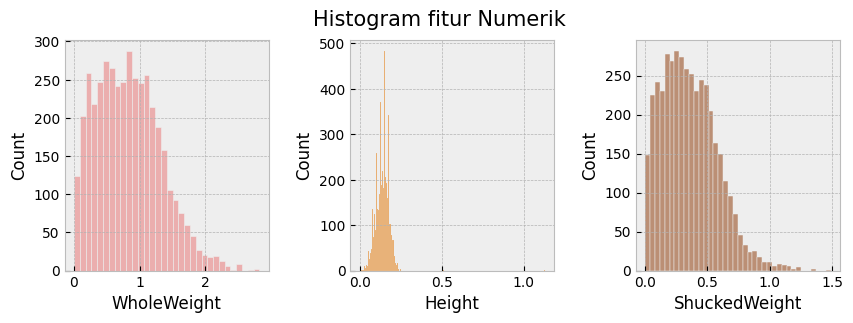

In [ ]:
# Distribusi fitur numerik
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 3))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, name in enumerate(numeric):
        plt.subplot(1, 3, i+1)
        sns.histplot(data=data, x=name, color=colors[i])

    # Menambahkan judul keseluruhan plot
    plt.suptitle('Histogram fitur Numerik', fontsize=15)

    # Menampilkan plot
    plt.show()

# Klasifikasi kNN

## 2 Parameter (Height dan WholeWeight)

**MENENTUKAN VARIABEL INDEPENDEN (X) DAN VARIABEL DEPENDEN (Y)**

In [ ]:
# # Membuat variabel independen dari 2 parameter
x_2 = data[['WholeWeight', 'Height']]

# Menentukan variabel dependen dari 2 parameter
y_2 = data['Type']

# Membagi data menjadi data training dan testing
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(
    x_2, y_2, test_size=0.1, random_state=42)

# Cetak ukuran data training dan testing
print("Jumlah data training:", len(x_2_train))
print("Jumlah data testing:", len(x_2_test))

Jumlah data training: 3756
Jumlah data testing: 418


**PRE-PROCESSING DATA (TIDAK PERLU KARENA HASIL AKURASI JADI MENURUN)**

In [ ]:
# # Memperbaiki distribusi data numerik

# # PowerTransformer (dengan metode Yeo-Johnson)
# pt = PowerTransformer(method='yeo-johnson')

# # Transformasi data numerik agar mendekati / lebih terdistribusi secara normal
# x_2_train_pt = pt.fit_transform(x_2_train)

# # Cetak hasil transformasi
# print(x_2_train_pt)

In [ ]:
# # Normalisasi data menggunakan min-max scaler ke skala 0-1
# # Penskalaan diperlukan untuk knn yang sensitif terhadap penskalaan dan outlier

# mm = MinMaxScaler()
# x_2_train_scaled = mm.fit_transform(x_2_train)

In [ ]:
# # Menggunakan SMOTE (Synthetic Minority Over-sampling Technique) dalam menangani ketidakseimbangan kelas

# # Membuat SMOTE instance
# smote = SMOTE(random_state=42)

# # Melakukan oversampling hanya pada data training
# x_2_train_smote, y_2_train_smote = smote.fit_resample(x_2_train_scaled, y_2_train)

# # Cetak ukuran data training yang telah seimbang
# print("Jumlah data training setelah SMOTE:", len(x_2_train_smote))

In [ ]:
# # Hasil Distribusi Fitur Setelah Transformasi dan Penskalaan
# pd.DataFrame(x_2_train_pt, columns=x_2.columns).hist(figsize=(6, 4), color='#AB704D')
# plt.show()

**MENENTUKAN NILAI K (DENGAN GRIDSEARCHCV)**

In [ ]:
# Tentukan nilai k dengan GridSearchCV

# Masukkan rentang k
param_grid = {'n_neighbors': np.arange(1, 100)}

# Buat objek GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')

# Latih model menggunakan data training yang telah di-SMOTE, di-transformasi, dan di-scaling
grid_search.fit(x_2_train, y_2_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'n_neighbors': 75}


Selanjutnya akan digunanakan percobaan 4 jenis distance untuk klasifikasi kNN, yaitu:

*   Model 1 : Default Distance (Minkowski)
*   Model 2 : Cosine Distance
*   Model 3 : Euclidean Distance
*   Model 4 : Manhattan Distance



#### Default Distance (Minkowski)

In [ ]:
#mengaktifkan fungsi klasifikasi
v_2_klasifikasi_minkowski = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

#memasukkan data training pada fungsi klasifikasi
v_2_klasifikasi_minkowski.fit(x_2_train, y_2_train)

KNeighborsClassifier(n_neighbors=75)

In [ ]:
#menentukan hasil prediksi dari x_test
y_2_pred_minkowski = v_2_klasifikasi_minkowski.predict(x_2_test)
y_2_pred_minkowski

array(['M', 'M', 'M', 'I', 'I', 'M', 'F', 'I', 'M', 'M', 'M', 'I', 'M',
       'M', 'M', 'F', 'M', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'M',
       'M', 'F', 'I', 'M', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'I',
       'I', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'I', 'M', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'M', 'M', 'F', 'I', 'I', 'I', 'M', 'F', 'F', 'M', 'I', 'M',
       'F', 'I', 'I', 'I', 'M', 'I', 'M', 'F', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'F', 'I', 'I', 'M', 'M', 'F', 'M', 'I', 'I', 'F', 'I', 'M',
       'F', 'I', 'I', 'M', 'I', 'F', 'M', 'M', 'M', 'I', 'F', 'I', 'M',
       'F', 'I', 'I', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'M', 'I', 'M', 'M',
       'F', 'M', 'M', 'I', 'F', 'F', 'I', 'M', 'M', 'I', 'I', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'I', 'M', 'M', 'M', 'I', 'F', 'F

#### Cosine

In [ ]:
# Mengaktifkan fungsi klasifikasi dengan nilai k terbaik dan metrik jarak cosine
v_2_klasifikasi_cosine = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='cosine')

# Memasukkan data training pada fungsi klasifikasi
v_2_klasifikasi_cosine.fit(x_2_train, y_2_train)

KNeighborsClassifier(metric='cosine', n_neighbors=75)

In [ ]:
#menentukan hasil prediksi dari x_test
y_2_pred_cosine = v_2_klasifikasi_cosine.predict(x_2_test)
y_2_pred_cosine

array(['M', 'M', 'M', 'M', 'I', 'I', 'F', 'I', 'F', 'F', 'I', 'I', 'M',
       'F', 'M', 'M', 'I', 'I', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'M',
       'M', 'I', 'I', 'M', 'M', 'M', 'I', 'M', 'M', 'I', 'I', 'I', 'I',
       'I', 'M', 'F', 'M', 'I', 'I', 'F', 'F', 'M', 'M', 'I', 'M', 'M',
       'I', 'F', 'I', 'F', 'I', 'I', 'I', 'F', 'I', 'I', 'F', 'M', 'I',
       'F', 'I', 'M', 'M', 'I', 'I', 'I', 'M', 'M', 'M', 'M', 'I', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'M', 'I', 'F', 'M', 'F', 'I',
       'I', 'I', 'F', 'F', 'I', 'I', 'I', 'M', 'I', 'F', 'I', 'I', 'I',
       'M', 'F', 'I', 'F', 'M', 'M', 'F', 'F', 'I', 'I', 'M', 'I', 'I',
       'M', 'I', 'M', 'M', 'I', 'M', 'I', 'F', 'M', 'M', 'M', 'I', 'M',
       'F', 'I', 'I', 'I', 'M', 'I', 'F', 'I', 'M', 'I', 'M', 'I', 'I',
       'I', 'M', 'F', 'I', 'I', 'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M',
       'M', 'M', 'F', 'M', 'M', 'M', 'I', 'F', 'M', 'I', 'I', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'F', 'I', 'F', 'M', 'I', 'M', 'I

#### Euclidean

In [ ]:
#mengaktifkan fungsi klasifikasi
v_2_klasifikasi_euclidean = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='euclidean')

#memasukkan data training pada fungsi klasifikasi
v_2_klasifikasi_euclidean.fit(x_2_train, y_2_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=75)

In [ ]:
#menentukan hasil prediksi dari x_test
y_2_pred_euclidean = v_2_klasifikasi_euclidean.predict(x_2_test)
y_2_pred_euclidean

array(['M', 'M', 'M', 'I', 'I', 'M', 'F', 'I', 'M', 'M', 'M', 'I', 'M',
       'M', 'M', 'F', 'M', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'M',
       'M', 'F', 'I', 'M', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'I',
       'I', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'I', 'M', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'M', 'M', 'F', 'I', 'I', 'I', 'M', 'F', 'F', 'M', 'I', 'M',
       'F', 'I', 'I', 'I', 'M', 'I', 'M', 'F', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'F', 'I', 'I', 'M', 'M', 'F', 'M', 'I', 'I', 'F', 'I', 'M',
       'F', 'I', 'I', 'M', 'I', 'F', 'M', 'M', 'M', 'I', 'F', 'I', 'M',
       'F', 'I', 'I', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'M', 'I', 'M', 'M',
       'F', 'M', 'M', 'I', 'F', 'F', 'I', 'M', 'M', 'I', 'I', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'I', 'M', 'M', 'M', 'I', 'F', 'F

#### Manhattan

In [ ]:
#mengaktifkan fungsi klasifikasi
v_2_klasifikasi_manhattan = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='manhattan')

#memasukkan data training pada fungsi klasifikasi
v_2_klasifikasi_manhattan.fit(x_2_train, y_2_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=75)

In [ ]:
#menentukan hasil prediksi dari x_test
y_2_pred_manhattan = v_2_klasifikasi_manhattan.predict(x_2_test)
y_2_pred_manhattan

array(['M', 'M', 'M', 'I', 'I', 'M', 'F', 'I', 'M', 'M', 'M', 'I', 'M',
       'M', 'M', 'F', 'M', 'I', 'M', 'I', 'F', 'M', 'I', 'M', 'I', 'M',
       'M', 'F', 'I', 'M', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'I',
       'I', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'F', 'M', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'M', 'M', 'M', 'I', 'I', 'I', 'M', 'F', 'M', 'M', 'I', 'M',
       'F', 'I', 'I', 'I', 'M', 'I', 'M', 'F', 'I', 'F', 'I', 'F', 'I',
       'I', 'I', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'F', 'I', 'M', 'M', 'M', 'F', 'F', 'I', 'I', 'M', 'I', 'M',
       'M', 'I', 'M', 'M', 'I', 'F', 'M', 'M', 'M', 'I', 'M', 'I', 'M',
       'F', 'I', 'I', 'I', 'M', 'I', 'F', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'M', 'I', 'I', 'I', 'M', 'I', 'M', 'M',
       'F', 'M', 'M', 'I', 'F', 'F', 'I', 'M', 'M', 'I', 'I', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'I', 'I', 'F', 'M', 'I', 'M', 'F

## 3 Parameter (Height, WholeWeight, dan ShuckedWeight)

**MENENTUKAN VARIABEL INDEPENDEN (X) DAN VARIABEL DEPENDEN (Y)**

In [ ]:
# # Membuat variabel independen dari 2 parameter
x_3 = data[['Height', 'WholeWeight', 'ShuckedWeight']]

# Menentukan variabel dependen dari 2 parameter
y_3 = data['Type']

# Membagi data menjadi data training dan testing
x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(
    x_3, y_3, test_size=0.1, random_state=42)

# Cetak ukuran data training dan testing
print("Jumlah data training:", len(x_3_train))
print("Jumlah data testing:", len(x_3_test))

Jumlah data training: 3756
Jumlah data testing: 418


**PRE-PROCESSING DATA (TIDAK PERLU KARENA HASIL AKURASI JADI MENURUN)**

In [ ]:
# # Memperbaiki distribusi data numerik

# # PowerTransformer (dengan metode Yeo-Johnson)
# pt = PowerTransformer(method='yeo-johnson')

# # Transformasi data numerik agar mendekati / lebih terdistribusi secara normal
# x_3_train_pt = pt.fit_transform(x_3_train)

# # Cetak hasil transformasi
# print(x_3_train_pt)

In [ ]:
# # Normalisasi data menggunakan min-max scaler ke skala 0-1
# # Penskalaan diperlukan untuk knn yang sensitif terhadap penskalaan dan outlier

# mm = MinMaxScaler()
# x_3_train_scaled = mm.fit_transform(x_3_train_pt)

In [ ]:
# # Menggunakan SMOTE (Synthetic Minority Over-sampling Technique) dalam menangani ketidakseimbangan kelas

# # Membuat SMOTE instance
# smote = SMOTE(random_state=42)

# # Melakukan oversampling hanya pada data training
# x_3_train_smote, y_3_train_smote = smote.fit_resample(x_3_train_scaled, y_3_train)

# # Cetak ukuran data training yang telah seimbang
# print("Jumlah data training setelah SMOTE:", len(x_3_train_smote))

In [ ]:
# # Hasil Distribusi Fitur Setelah Transformasi dan Penskalaan
# pd.DataFrame(x_3_train_smote, columns=x_3.columns).hist(figsize=(10, 6), color='#AB704D')
# plt.show()

**MENENTUKAN NILAI K (GRIDSEARCHCV)**

In [ ]:
# Masukkan rentang k
param_grid = {'n_neighbors': np.arange(1, 100)}

# Buat objek GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')

# Latih model menggunakan data training yang telah di-SMOTE, di-transformasi, dan di-scaling
grid_search.fit(x_3_train, y_3_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'n_neighbors': 80}


Selanjutnya akan digunanakan percobaan 4 jenis distance untuk klasifikasi kNN, yaitu:

*   Model 1 : Default Distance (Minkowski)
*   Model 2 : Cosine Distance
*   Model 3 : Euclidean Distance
*   Model 4 : Manhattan Distance

#### Default Distance (Minkowski)

In [ ]:
#mengaktifkan fungsi klasifikasi
v_3_klasifikasi_minkowski = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

#memasukkan data training pada fungsi klasifikasi
v_3_klasifikasi_minkowski.fit(x_3_train, y_3_train)

KNeighborsClassifier(n_neighbors=80)

In [ ]:
#menentukan hasil prediksi dari x_test
y_3_pred_minkowski = v_3_klasifikasi_minkowski.predict(x_3_test)
y_3_pred_minkowski

array(['F', 'F', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'F', 'I', 'I', 'M',
       'M', 'M', 'F', 'F', 'I', 'M', 'I', 'M', 'F', 'I', 'M', 'I', 'M',
       'M', 'M', 'I', 'M', 'M', 'F', 'I', 'M', 'F', 'I', 'I', 'I', 'I',
       'I', 'F', 'F', 'F', 'I', 'M', 'M', 'F', 'M', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'I', 'M', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'F', 'I', 'M', 'I', 'I', 'I', 'M', 'F', 'F', 'M', 'I', 'F',
       'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'M', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'I', 'I', 'M', 'I', 'F',
       'M', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'F', 'I', 'F', 'I', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M',
       'M', 'M', 'M', 'I', 'F', 'M', 'I', 'M', 'F', 'I', 'I', 'F', 'F',
       'M', 'M', 'F', 'M', 'M', 'F', 'I', 'M', 'F', 'I', 'F', 'I

#### Cosine

In [ ]:
#mengaktifkan fungsi klasifikasi
v_3_klasifikasi_cosine = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='cosine')

#memasukkan data training pada fungsi klasifikasi
v_3_klasifikasi_cosine.fit(x_3_train, y_3_train)

KNeighborsClassifier(metric='cosine', n_neighbors=80)

In [ ]:
#menentukan hasil prediksi dari x_test
y_3_pred_cosine = v_3_klasifikasi_cosine.predict(x_3_test)
y_3_pred_cosine

array(['F', 'F', 'M', 'M', 'I', 'I', 'F', 'I', 'M', 'F', 'I', 'I', 'M',
       'F', 'M', 'F', 'F', 'I', 'F', 'F', 'M', 'F', 'I', 'F', 'I', 'F',
       'M', 'F', 'I', 'F', 'M', 'F', 'I', 'F', 'M', 'I', 'I', 'I', 'I',
       'I', 'M', 'F', 'M', 'I', 'I', 'M', 'M', 'F', 'M', 'I', 'M', 'F',
       'I', 'I', 'I', 'F', 'I', 'I', 'F', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'F', 'M', 'F', 'I', 'I', 'I', 'F', 'F', 'F', 'F', 'I', 'M',
       'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'M', 'F', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'I', 'I', 'F', 'I', 'M',
       'M', 'I', 'I', 'I', 'I', 'M', 'I', 'F', 'F', 'M', 'F', 'I', 'F',
       'F', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'M', 'F', 'M', 'I', 'I',
       'I', 'F', 'F', 'F', 'F', 'F', 'I', 'I', 'I', 'M', 'F', 'M', 'F',
       'M', 'M', 'M', 'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'M', 'F',
       'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'I', 'M', 'I

#### Euclidean

In [ ]:
#mengaktifkan fungsi klasifikasi
v_3_klasifikasi_euclidean = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='euclidean')

#memasukkan data training pada fungsi klasifikasi
v_3_klasifikasi_euclidean.fit(x_3_train, y_3_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=80)

In [ ]:
#menentukan hasil prediksi dari x_test
y_3_pred_euclidean = v_3_klasifikasi_euclidean.predict(x_3_test)
y_3_pred_euclidean

array(['F', 'F', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'F', 'I', 'I', 'M',
       'M', 'M', 'F', 'F', 'I', 'M', 'I', 'M', 'F', 'I', 'M', 'I', 'M',
       'M', 'M', 'I', 'M', 'M', 'F', 'I', 'M', 'F', 'I', 'I', 'I', 'I',
       'I', 'F', 'F', 'F', 'I', 'M', 'M', 'F', 'M', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'I', 'M', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'F', 'I', 'M', 'I', 'I', 'I', 'M', 'F', 'F', 'M', 'I', 'F',
       'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'M', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'I', 'I', 'M', 'I', 'F',
       'M', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'F', 'I', 'F', 'I', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M',
       'M', 'M', 'M', 'I', 'F', 'M', 'I', 'M', 'F', 'I', 'I', 'F', 'F',
       'M', 'M', 'F', 'M', 'M', 'F', 'I', 'M', 'F', 'I', 'F', 'I

#### Manhattan



In [ ]:
#mengaktifkan fungsi klasifikasi
v_3_klasifikasi_manhattan = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='manhattan')

#memasukkan data training pada fungsi klasifikasi
v_3_klasifikasi_manhattan.fit(x_3_train, y_3_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=80)

In [ ]:
#menentukan hasil prediksi dari x_test
y_3_pred_manhattan = v_3_klasifikasi_manhattan.predict(x_3_test)
y_3_pred_manhattan

array(['F', 'F', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'M', 'I', 'I', 'M',
       'F', 'M', 'F', 'F', 'I', 'M', 'I', 'M', 'M', 'I', 'M', 'I', 'M',
       'F', 'M', 'I', 'M', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'I',
       'I', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'I', 'M', 'F',
       'I', 'M', 'I', 'M', 'I', 'F', 'F', 'M', 'I', 'I', 'F', 'M', 'I',
       'F', 'F', 'I', 'M', 'I', 'I', 'I', 'M', 'F', 'F', 'M', 'I', 'F',
       'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M', 'I', 'M', 'I', 'F', 'I',
       'I', 'I', 'I', 'M', 'I', 'I', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'I', 'I', 'F', 'I', 'F',
       'M', 'I', 'I', 'I', 'I', 'M', 'I', 'M', 'F', 'I', 'F', 'I', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'I', 'M', 'I', 'F', 'I', 'I',
       'I', 'M', 'M', 'I', 'F', 'F', 'I', 'I', 'I', 'F', 'I', 'M', 'M',
       'M', 'M', 'F', 'I', 'F', 'M', 'I', 'M', 'F', 'I', 'I', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'I', 'I', 'M', 'M', 'I', 'F', 'F

# Evaluasi Model kNN


*   Confusion Matrix : menghitung jumlah kelas yang berhasil diprediksi dengan akurat dan tidak akurat
*   Accuracy : menghitung akurasi model kNN
*   Precision : menghitung ketepatan klasifikasi/rasio prediksi TP dengan keseluruhan data yang diprediksi TP
*   Recall : menghitung kemampuan model dalam memprediksi seluruh kelas secara akurat/rasio prediksi TP dengan keseluruhan data TP
*   F1 Score : rasio rata-rata presisi dan recall yang dibobotkan



## Classification Report

**2 PARAMETER**

In [ ]:
# Laporan klasifikasi untuk masing-masing model
v_2_report_minkowski = classification_report(y_2_test, y_2_pred_minkowski)
v_2_report_cosine = classification_report(y_2_test, y_2_pred_cosine)
v_2_report_euclidean = classification_report(y_2_test, y_2_pred_euclidean)
v_2_report_manhattan = classification_report(y_2_test, y_2_pred_manhattan)

# Menampilkan laporan klasifikasi untuk masing-masing model pada 2 parameter
print("2 PARAMETER")
print("")

print("Model pertama : Default Distance (Minkowski)")
print(v_2_report_minkowski)

print("Model kedua : Cosine Distance")
print(v_2_report_cosine)

print("Model ketiga : Euclidean Distance")
print(v_2_report_euclidean)

print("Model keempat : Manhattan Distance")
print(v_2_report_manhattan)

2 PARAMETER

Model pertama : Default Distance (Minkowski)
              precision    recall  f1-score   support

           F       0.44      0.30      0.36       134
           I       0.60      0.80      0.68       128
           M       0.45      0.45      0.45       156

    accuracy                           0.51       418
   macro avg       0.49      0.51      0.50       418
weighted avg       0.49      0.51      0.49       418

Model kedua : Cosine Distance
              precision    recall  f1-score   support

           F       0.35      0.21      0.26       134
           I       0.58      0.85      0.69       128
           M       0.40      0.39      0.40       156

    accuracy                           0.47       418
   macro avg       0.45      0.48      0.45       418
weighted avg       0.44      0.47      0.44       418

Model ketiga : Euclidean Distance
              precision    recall  f1-score   support

           F       0.44      0.30      0.36       134
       

**3 PARAMETER**

In [ ]:
# Laporan klasifikasi untuk masing-masing model
v_3_report_minkowski = classification_report(y_3_test, y_3_pred_minkowski)
v_3_report_cosine = classification_report(y_3_test, y_3_pred_cosine)
v_3_report_euclidean = classification_report(y_3_test, y_3_pred_euclidean)
v_3_report_manhattan = classification_report(y_3_test, y_3_pred_manhattan)

# Menampilkan laporan klasifikasi untuk masing-masing model
print("3 PARAMETER")
print("")

print("Model pertama : Default Distance (Minkowski)")
print(v_3_report_minkowski)

print("Model kedua : Cosine Distance")
print(v_3_report_cosine)

print("Model ketiga : Euclidean Distance")
print(v_3_report_euclidean)

print("Model keempat : Manhattan Distance")
print(v_3_report_manhattan)

3 PARAMETER

Model pertama : Default Distance (Minkowski)
              precision    recall  f1-score   support

           F       0.46      0.30      0.36       134
           I       0.61      0.86      0.72       128
           M       0.48      0.47      0.47       156

    accuracy                           0.53       418
   macro avg       0.52      0.54      0.52       418
weighted avg       0.51      0.53      0.51       418

Model kedua : Cosine Distance
              precision    recall  f1-score   support

           F       0.44      0.41      0.43       134
           I       0.63      0.83      0.72       128
           M       0.48      0.39      0.43       156

    accuracy                           0.53       418
   macro avg       0.52      0.54      0.53       418
weighted avg       0.52      0.53      0.52       418

Model ketiga : Euclidean Distance
              precision    recall  f1-score   support

           F       0.46      0.30      0.36       134
       

## Confusion Matrix

**2 PARAMETER**

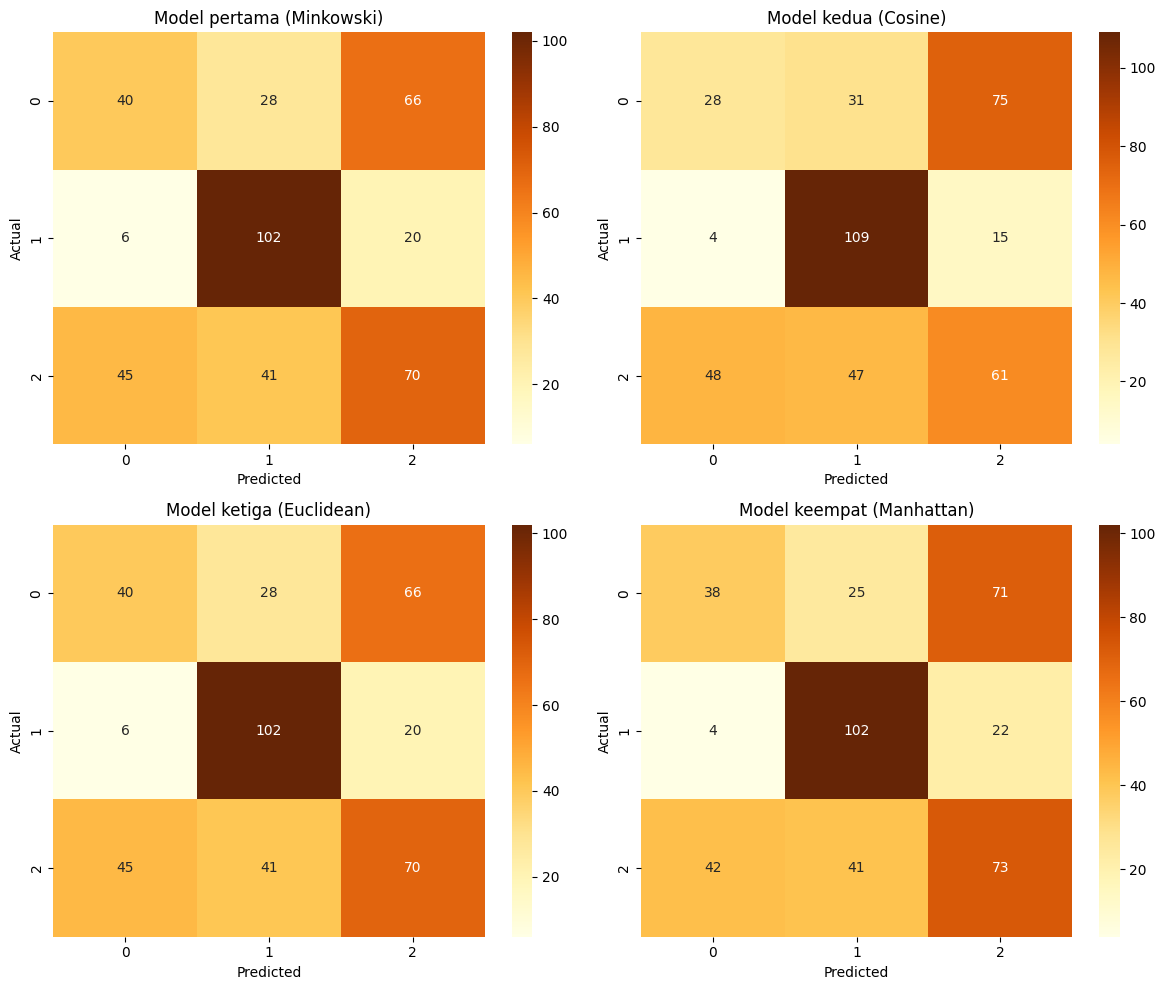

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix untuk masing-masing model
v_2_cm_minkowski = confusion_matrix(y_2_test, y_2_pred_minkowski)
v_2_cm_cosine = confusion_matrix(y_2_test, y_2_pred_cosine)
v_2_cm_euclidean = confusion_matrix(y_2_test, y_2_pred_euclidean)
v_2_cm_manhattan = confusion_matrix(y_2_test, y_2_pred_manhattan)

# Daftar confusion matrix dan nama model
confusion_matrices = [v_2_cm_minkowski, v_2_cm_cosine, v_2_cm_euclidean, v_2_cm_manhattan]
model_names = ["Model pertama (Minkowski)", "Model kedua (Cosine)", "Model ketiga (Euclidean)", "Model keempat (Manhattan)"]

# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Melakukan iterasi untuk setiap confusion matrix dan nama model
for ax, cm, model_name in zip(axes.flatten(), confusion_matrices, model_names):
    # Membuat heatmap
    sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


**3 PARAMETER**

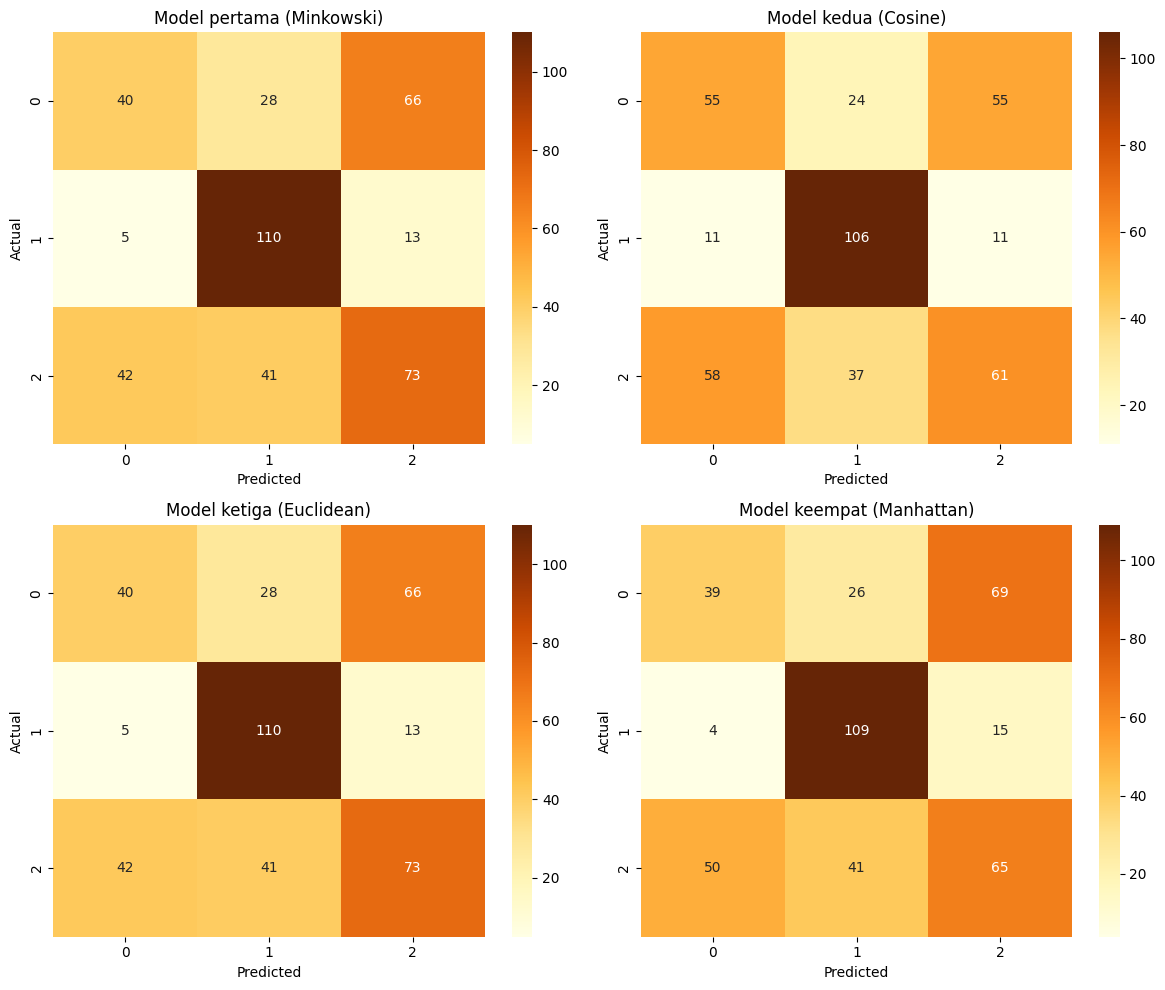

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix untuk masing-masing model
v_3_cm_minkowski = confusion_matrix(y_3_test, y_3_pred_minkowski)
v_3_cm_cosine = confusion_matrix(y_3_test, y_3_pred_cosine)
v_3_cm_euclidean = confusion_matrix(y_3_test, y_3_pred_euclidean)
v_3_cm_manhattan = confusion_matrix(y_3_test, y_3_pred_manhattan)

# Daftar confusion matrix dan nama model
confusion_matrices = [v_3_cm_minkowski, v_3_cm_cosine, v_3_cm_euclidean, v_3_cm_manhattan]
model_names = ["Model pertama (Minkowski)", "Model kedua (Cosine)", "Model ketiga (Euclidean)", "Model keempat (Manhattan)"]

# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Melakukan iterasi untuk setiap confusion matrix dan nama model
for ax, cm, model_name in zip(axes.flatten(), confusion_matrices, model_names):
    # Membuat heatmap
    sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Accuracy

**2 PARAMETER**

In [ ]:
v_2_accuracy_minkowski = accuracy_score(y_2_test, y_2_pred_minkowski)
v_2_accuracy_cosine = accuracy_score(y_2_test, y_2_pred_cosine)
v_2_accuracy_euclidean = accuracy_score(y_2_test, y_2_pred_euclidean)
v_2_accuracy_manhattan = accuracy_score(y_2_test, y_2_pred_manhattan)

print("Akurasi:", v_2_accuracy_minkowski)
print("Akurasi:", v_2_accuracy_cosine)
print("Akurasi:", v_2_accuracy_euclidean)
print("Akurasi:", v_2_accuracy_manhattan)

Akurasi: 0.507177033492823
Akurasi: 0.47368421052631576
Akurasi: 0.507177033492823
Akurasi: 0.5095693779904307


**3 PARAMETER**

In [ ]:
v_3_accuracy_minkowski = accuracy_score(y_3_test, y_3_pred_minkowski)
v_3_accuracy_cosine = accuracy_score(y_3_test, y_3_pred_cosine)
v_3_accuracy_euclidean = accuracy_score(y_3_test, y_3_pred_euclidean)
v_3_accuracy_manhattan = accuracy_score(y_3_test, y_3_pred_manhattan)

print("Akurasi:", v_3_accuracy_minkowski)
print("Akurasi:", v_3_accuracy_cosine)
print("Akurasi:", v_3_accuracy_euclidean)
print("Akurasi:", v_3_accuracy_manhattan)

Akurasi: 0.5334928229665071
Akurasi: 0.5311004784688995
Akurasi: 0.5334928229665071
Akurasi: 0.5095693779904307


## Precision

**2 PARAMETER**

In [ ]:
v_2_precision_minkowski = precision_score(y_2_test, y_2_pred_minkowski, average='weighted')
v_2_precision_cosine = precision_score(y_2_test, y_2_pred_cosine, average='weighted')
v_2_precision_euclidean = precision_score(y_2_test, y_2_pred_euclidean, average='weighted')
v_2_precision_manhattan = precision_score(y_2_test, y_2_pred_manhattan, average='weighted')

print("Presisi:", v_2_precision_minkowski)
print("Presisi:", v_2_precision_cosine)
print("Presisi:", v_2_precision_euclidean)
print("Presisi:", v_2_precision_manhattan)

Presisi: 0.4910334356317736
Presisi: 0.4414581177466939
Presisi: 0.4910334356317736
Presisi: 0.4950615860571472


**3 PARAMETER**

In [ ]:
v_3_precision_minkowski = precision_score(y_3_test, y_3_pred_minkowski, average='weighted')
v_3_precision_cosine = precision_score(y_3_test, y_3_pred_cosine, average='weighted')
v_3_precision_euclidean = precision_score(y_3_test, y_3_pred_euclidean, average='weighted')
v_3_precision_manhattan = precision_score(y_3_test, y_3_pred_manhattan, average='weighted')

print("Presisi:", v_3_precision_minkowski)
print("Presisi:", v_3_precision_cosine)
print("Presisi:", v_3_precision_euclidean)
print("Presisi:", v_3_precision_manhattan)

Presisi: 0.5148073347152459
Presisi: 0.5158137002661995
Presisi: 0.5148073347152459
Presisi: 0.4868898730502197


## Recall

**2 PARAMETER**

In [ ]:
v_2_recall_minkowski = recall_score(y_2_test, y_2_pred_minkowski, average='weighted')
v_2_recall_cosine = recall_score(y_2_test, y_2_pred_cosine, average='weighted')
v_2_recall_euclidean = recall_score(y_2_test, y_2_pred_euclidean, average='weighted')
v_2_recall_manhattan = recall_score(y_2_test, y_2_pred_manhattan, average='weighted')

print("Recall:", v_2_recall_minkowski)
print("Recall:", v_2_recall_cosine)
print("Recall:", v_2_recall_euclidean)
print("Recall:", v_2_recall_manhattan)

Recall: 0.507177033492823
Recall: 0.47368421052631576
Recall: 0.507177033492823
Recall: 0.5095693779904307


**3 PARAMETER**

In [ ]:
v_3_recall_minkowski = recall_score(y_3_test, y_3_pred_minkowski, average='weighted')
v_3_recall_cosine = recall_score(y_3_test, y_3_pred_cosine, average='weighted')
v_3_recall_euclidean = recall_score(y_3_test, y_3_pred_euclidean, average='weighted')
v_3_recall_manhattan = recall_score(y_3_test, y_3_pred_manhattan, average='weighted')

print("Recall:", v_3_recall_minkowski)
print("Recall:", v_3_recall_cosine)
print("Recall:", v_3_recall_euclidean)
print("Recall:", v_3_recall_manhattan)

Recall: 0.5334928229665071
Recall: 0.5311004784688995
Recall: 0.5334928229665071
Recall: 0.5095693779904307


## F1 Score

**2 PARAMETER**

In [ ]:
v_2_f1_minkowski = f1_score(y_2_test, y_2_pred_minkowski, average='weighted')
v_2_f1_cosine = f1_score(y_2_test, y_2_pred_cosine, average='weighted')
v_2_f1_euclidean = f1_score(y_2_test, y_2_pred_euclidean, average='weighted')
v_2_f1_manhattan = f1_score(y_2_test, y_2_pred_manhattan, average='weighted')

print("F1-score:", v_2_f1_minkowski)
print("F1-score:", v_2_f1_cosine)
print("F1-score:", v_2_f1_euclidean)
print("F1-score:", v_2_f1_manhattan)

F1-score: 0.4903721246970674
F1-score: 0.4441220882461583
F1-score: 0.4903721246970674
F1-score: 0.492020889476435


**3 PARAMETER**

In [ ]:
v_3_f1_minkowski = f1_score(y_3_test, y_3_pred_minkowski, average='weighted')
v_3_f1_cosine = f1_score(y_3_test, y_3_pred_cosine, average='weighted')
v_3_f1_euclidean = f1_score(y_3_test, y_3_pred_euclidean, average='weighted')
v_3_f1_manhattan = f1_score(y_3_test, y_3_pred_manhattan, average='weighted')

print("F1-score:", v_3_f1_minkowski)
print("F1-score:", v_3_f1_cosine)
print("F1-score:", v_3_f1_euclidean)
print("F1-score:", v_3_f1_manhattan)

F1-score: 0.5123952718736592
F1-score: 0.517629442621839
F1-score: 0.5123952718736592
F1-score: 0.48881657853190236


# Testing Model

Terakhir, akan dilakukan uji coba model klasifikasi kNN yang telah dibuat sebelumnya. Data uji yang digunakan adalah baris data yang tidak digunakan dalam proses training dan testing model sebelumnya sehingga data ini akan bersifat baru untuk model.

Ada pun  baris data tersebut, yaitu:
* M (0.095,0.514,0.2245)
* F (0.135,0.677,0.2565)
* I (0.08,0.205,0.0895)

**2 PARAMETER**

1. TYPE M (0.095,0.514)


In [ ]:
# Inputan pengguna untuk nilai Height dan WholeWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_2_pred_minkowski = v_2_klasifikasi_minkowski.predict(input_data)
v_2_pred_cosine = v_2_klasifikasi_cosine.predict(input_data)
v_2_pred_euclidean = v_2_klasifikasi_euclidean.predict(input_data)
v_2_pred_manhattan = v_2_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("")
print("Hasil prediksi untuk inputan pengguna:")
print("Model pertama (Minkowski):", v_2_pred_minkowski[0])
print("Model kedua (Cosine):", v_2_pred_cosine[0])
print("Model ketiga (Euclidean):", v_2_pred_euclidean[0])
print("Model keempat (Manhattan):", v_2_pred_manhattan[0])

Masukkan nilai Height: 0.095
Masukkan nilai WholeWeight: 0.514

Hasil prediksi untuk inputan pengguna:
Model pertama (Minkowski): I
Model kedua (Cosine): I
Model ketiga (Euclidean): I
Model keempat (Manhattan): I


2. TYPE F (0.135,0.677)

In [ ]:
# Inputan pengguna untuk nilai Height dan WholeWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_2_pred_minkowski = v_2_klasifikasi_minkowski.predict(input_data)
v_2_pred_cosine = v_2_klasifikasi_cosine.predict(input_data)
v_2_pred_euclidean = v_2_klasifikasi_euclidean.predict(input_data)
v_2_pred_manhattan = v_2_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("")
print("Hasil prediksi untuk inputan pengguna:")
print("Model pertama (Minkowski):", v_2_pred_minkowski[0])
print("Model kedua (Cosine):", v_2_pred_cosine[0])
print("Model ketiga (Euclidean):", v_2_pred_euclidean[0])
print("Model keempat (Manhattan):", v_2_pred_manhattan[0])

Masukkan nilai Height: 0.135
Masukkan nilai WholeWeight: 0.677

Hasil prediksi untuk inputan pengguna:
Model pertama (Minkowski): I
Model kedua (Cosine): I
Model ketiga (Euclidean): I
Model keempat (Manhattan): I


3. TYPE I (0.08,0.205)

In [ ]:
# Inputan pengguna untuk nilai Height dan WholeWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_2_pred_minkowski = v_2_klasifikasi_minkowski.predict(input_data)
v_2_pred_cosine = v_2_klasifikasi_cosine.predict(input_data)
v_2_pred_euclidean = v_2_klasifikasi_euclidean.predict(input_data)
v_2_pred_manhattan = v_2_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("")
print("Hasil prediksi untuk inputan pengguna:")
print("Model pertama (Minkowski):", v_2_pred_minkowski[0])
print("Model kedua (Cosine):", v_2_pred_cosine[0])
print("Model ketiga (Euclidean):", v_2_pred_euclidean[0])
print("Model keempat (Manhattan):", v_2_pred_manhattan[0])

Masukkan nilai Height: 0.08
Masukkan nilai WholeWeight: 0.205

Hasil prediksi untuk inputan pengguna:
Model pertama (Minkowski): I
Model kedua (Cosine): I
Model ketiga (Euclidean): I
Model keempat (Manhattan): I


**3 PARAMETER**

1. TYPE M (0.095,0.514,0.2245)

In [ ]:
# Inputan pengguna untuk nilai Height, WholeWeight, dan ShuckedWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))
shucked_weight = float(input("Masukkan nilai Shucked Weight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight, shucked_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_3_pred_minkowski = v_3_klasifikasi_minkowski.predict(input_data)
v_3_pred_cosine = v_3_klasifikasi_cosine.predict(input_data)
v_3_pred_euclidean = v_3_klasifikasi_euclidean.predict(input_data)
v_3_pred_manhattan = v_3_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("Hasil prediksi untuk inputan pengguna (3 parameter):")
print("Model pertama (Minkowski):", v_3_pred_minkowski[0])
print("Model kedua (Cosine):", v_3_pred_cosine[0])
print("Model ketiga (Euclidean):", v_3_pred_euclidean[0])
print("Model keempat (Manhattan):", v_3_pred_manhattan[0])

Masukkan nilai Height: 0.095
Masukkan nilai WholeWeight: 0.514
Masukkan nilai Shucked Weight: 0.2245
Hasil prediksi untuk inputan pengguna (3 parameter):
Model pertama (Minkowski): I
Model kedua (Cosine): F
Model ketiga (Euclidean): I
Model keempat (Manhattan): I


2. TYPE F (0.135,0.677,0.2565)

In [ ]:
# Inputan pengguna untuk nilai Height, WholeWeight, dan ShuckedWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))
shucked_weight = float(input("Masukkan nilai Shucked Weight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight, shucked_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_3_pred_minkowski = v_3_klasifikasi_minkowski.predict(input_data)
v_3_pred_cosine = v_3_klasifikasi_cosine.predict(input_data)
v_3_pred_euclidean = v_3_klasifikasi_euclidean.predict(input_data)
v_3_pred_manhattan = v_3_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("Hasil prediksi untuk inputan pengguna (3 parameter):")
print("Model pertama (Minkowski):", v_3_pred_minkowski[0])
print("Model kedua (Cosine):", v_3_pred_cosine[0])
print("Model ketiga (Euclidean):", v_3_pred_euclidean[0])
print("Model keempat (Manhattan):", v_3_pred_manhattan[0])

Masukkan nilai Height: 0.135
Masukkan nilai WholeWeight: 0.677
Masukkan nilai Shucked Weight: 0.2565
Hasil prediksi untuk inputan pengguna (3 parameter):
Model pertama (Minkowski): F
Model kedua (Cosine): F
Model ketiga (Euclidean): F
Model keempat (Manhattan): I


3. TYPE I (0.08,0.205,0.0895)

In [ ]:
# Inputan pengguna untuk nilai Height, WholeWeight, dan ShuckedWeight
height = float(input("Masukkan nilai Height: "))
whole_weight = float(input("Masukkan nilai WholeWeight: "))
shucked_weight = float(input("Masukkan nilai Shucked Weight: "))

# Membuat array dari inputan pengguna
input_data = np.array([[height, whole_weight, shucked_weight]])

# Prediksi menggunakan masing-masing model tanpa penskalaan
v_3_pred_minkowski = v_3_klasifikasi_minkowski.predict(input_data)
v_3_pred_cosine = v_3_klasifikasi_cosine.predict(input_data)
v_3_pred_euclidean = v_3_klasifikasi_euclidean.predict(input_data)
v_3_pred_manhattan = v_3_klasifikasi_manhattan.predict(input_data)

# Menampilkan hasil prediksi
print("Hasil prediksi untuk inputan pengguna (3 parameter):")
print("Model pertama (Minkowski):", v_3_pred_minkowski[0])
print("Model kedua (Cosine):", v_3_pred_cosine[0])
print("Model ketiga (Euclidean):", v_3_pred_euclidean[0])
print("Model keempat (Manhattan):", v_3_pred_manhattan[0])

Masukkan nilai Height: 0.08
Masukkan nilai WholeWeight: 0.205
Masukkan nilai Shucked Weight: 0.0895
Hasil prediksi untuk inputan pengguna (3 parameter):
Model pertama (Minkowski): I
Model kedua (Cosine): I
Model ketiga (Euclidean): I
Model keempat (Manhattan): I
